# Predicting Employee Productivity Using Tree Models

In this project we will use a UCI Machine Learning Repository dataset called Productivity Prediction of Garment Employees. We will use tree models to determine an optimal machine learning model for a gvien categorical predictor variable (non-regression).

In [1]:
import pandas as pd

# importing libararies

## Data Profiling & Cleaning

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

# importing data and reviewing top 5 rows

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.info()

# reviewing data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### Profiling and Cleaning the "Date Column"

In [5]:
df["date"].value_counts().sort_index()

1/1/2015     19
1/10/2015    22
1/11/2015    23
1/12/2015    23
1/13/2015    22
1/14/2015    21
1/15/2015    19
1/17/2015    21
1/18/2015    19
1/19/2015    19
1/20/2015    15
1/21/2015    19
1/22/2015    22
1/24/2015    23
1/25/2015    21
1/26/2015    19
1/27/2015    21
1/28/2015    21
1/29/2015    20
1/3/2015     21
1/31/2015    24
1/4/2015     21
1/5/2015     22
1/6/2015     21
1/7/2015     22
1/8/2015     22
2/1/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/14/2015    17
2/15/2015    19
2/16/2015    18
2/17/2015    20
2/18/2015    21
2/19/2015    20
2/2/2015     19
2/22/2015    20
2/23/2015    19
2/24/2015    19
2/25/2015    21
2/26/2015    21
2/28/2015    21
2/3/2015     19
2/4/2015     19
2/5/2015     18
2/7/2015     19
2/8/2015     19
2/9/2015     18
3/1/2015     20
3/10/2015    23
3/11/2015    24
3/2/2015     20
3/3/2015     22
3/4/2015     21
3/5/2015     19
3/7/2015     19
3/8/2015     22
3/9/2015     22
Name: date, dtype: int64

There are no null values and the counts seems to be spread fairly even by date.  The dates however are only spread out two-three months

#### Profiling and cleaning the "Quarter Column"

In [6]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

There are no null values but there is a 5th quarter.  After reviewing the definitions of the data, it says the quarters are split into four sections for each month.  It would make sense these are grouped by weeks but will further investigate.

In [7]:
Quarter1 = df[df["quarter"] == "Quarter1"]
Quarter1["date"].value_counts()

# confirming quarter 1 values are within the first 7 days of the month

1/5/2015    22
1/7/2015    22
3/3/2015    22
1/4/2015    21
1/6/2015    21
3/4/2015    21
1/3/2015    21
3/1/2015    20
3/2/2015    20
1/1/2015    19
3/5/2015    19
2/4/2015    19
2/7/2015    19
2/3/2015    19
2/2/2015    19
2/1/2015    19
3/7/2015    19
2/5/2015    18
Name: date, dtype: int64

In [8]:
Quarter2 = df[df["quarter"] == "Quarter2"]
Quarter2["date"].value_counts()

# confirming quarter 2 values are within the first 7-14 days of the month

3/11/2015    24
1/11/2015    23
1/12/2015    23
3/10/2015    23
1/8/2015     22
1/10/2015    22
1/13/2015    22
3/8/2015     22
3/9/2015     22
1/14/2015    21
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/9/2015     18
2/14/2015    17
Name: date, dtype: int64

In [9]:
Quarter3 = df[df["quarter"] == "Quarter3"]
Quarter3["date"].value_counts()

# confirming quarter 3 values are within the first 15-21 days of the month

1/17/2015    21
2/18/2015    21
2/17/2015    20
2/19/2015    20
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
2/15/2015    19
2/16/2015    18
1/20/2015    15
Name: date, dtype: int64

In [10]:
Quarter4 = df[df["quarter"] == "Quarter4"]
Quarter4["date"].value_counts()

# confirming quarter 4 values are within the first 22-28 days of the month

1/24/2015    23
1/22/2015    22
1/25/2015    21
1/27/2015    21
1/28/2015    21
2/25/2015    21
2/26/2015    21
2/28/2015    21
2/22/2015    20
1/26/2015    19
2/23/2015    19
2/24/2015    19
Name: date, dtype: int64

In [11]:
Quarter5 = df[df["quarter"] == "Quarter5"]
Quarter5["date"].value_counts()

# confirming quarter 1 values are > day 28

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

In [12]:
df["quarter"] = df["quarter"].replace("Quarter5", "Quarter4")

# changing quarter 5 days into quarter 4

In [13]:
df["quarter"].value_counts()

# confirming values were moved sucessfully

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

#### Profiling and Cleaning the "Department"

In [14]:
df["department"].value_counts()

# reviewing value counts of the department column.  Issue with the finishing value

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [15]:
df["department"].value_counts().index

# confirmed there is an extra space on the end of one value

Index(['sweing', 'finishing ', 'finishing'], dtype='object')

In [16]:
df["department"] = df["department"].replace("finishing ", "finishing")

# updating finishing value to remove leading space

In [17]:
df["department"].value_counts()

# confirmed space was removed properly

sweing       691
finishing    506
Name: department, dtype: int64

#### Profiling and Cleaning the "Day Column"

In [18]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

Doesn't appear to be any issues with the day of the week column.  Friday is missing however this might be a day off for everyone

#### Profiling and Cleaning the "team Column"

In [19]:
df["team"].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

teams are grouped in numbers.  No null values or apparent issues

#### Profiling and Cleaning the "targeted_productivity Column"

In [20]:
df["targeted_productivity"].value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

No missing values or apparent issues with the targeted_productivity column

### Comparing Targeted vs Actual Productivity

In [21]:
import matplotlib.pyplot as plt
targeted = df["targeted_productivity"]
actual = df["actual_productivity"]

data = [targeted, actual]

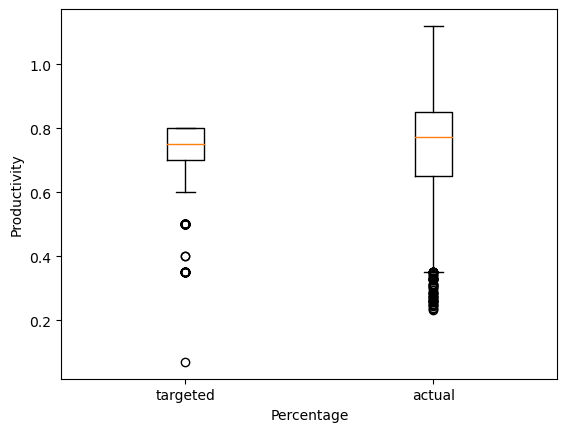

In [22]:
fig, ax = plt.subplots()

ax.boxplot(data, labels=["targeted", "actual"])
ax.set_xlabel("Percentage")
ax.set_ylabel("Productivity")
plt.show()

Per the boxplot we can see actual productivity ranges much more than the targeted amount but on average has a slightly higher mean.  Some values are greater than 100% which may be off.  Additionally, there are a significant number of low outliers in actual with also some low outliers in targeted which seems strange for both.

#### Profiling and Cleaning the "SMV Column"

In [23]:
df["smv"].describe()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

No null values or isses with the SMV column

#### Profiling and Cleaning the "WIP Column"

In [24]:
df["wip"].value_counts()

1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: wip, Length: 548, dtype: int64

In [25]:
df["wip"].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

Over half of the observations in the dataset are missing WIP.  This doesn't seem like something we should impute or use for our model.  Will remove this column fromt he dataset.

In [26]:
df = df.drop("wip", axis = 1)

#removes wip from the data

#### Profiling and Cleaning the "over_time Column"

In [27]:
df["over_time"].value_counts()

960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: over_time, Length: 143, dtype: int64

In [28]:
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Based on the summary statistics above, we can see overtime is very common with an average of 4,567 hours and a standard deviation of 3,348 hours.

#### Profiling and Cleaning the "incentive Column"

In [29]:
df["incentive"].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

In [30]:
df["incentive"].value_counts()

0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64

No null values although half of the observations of the dataset are 0 for incentives

#### Profiling and Cleaning the "idle_time and idle_men Column"

In [31]:
df["idle_time"].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [32]:
df["idle_men"].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

Per the value counts above it is very rare that we have data for this column (1,179 out of 1,197 are 0).  Will remove these columns from our dataset

In [33]:
df = df.drop(["idle_time", "idle_men"], axis = 1)

#### Profiling and Cleaning the "no_of_style_change Column"

In [34]:
df["no_of_style_change"].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

Again, this column may not be useful as the majority of obervations had no style change. There are 147 observations with changes so will leave this in the model.  No null values

#### Profiling and Cleaning the "no_of_workers Column"

In [35]:
df["no_of_workers"].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

No apparent issues or null values with the number of workers column.  There is a mean of 34 PN and a std deviation of 22 PN which tells us the size can range fairly significantly as compared to the porportion of total PN.

In [36]:
df = df.drop("date", axis = 1)

# dropping the date column as it seems a bit redundant with a day of the week column and quarter column

In [37]:
df["meets_target_productivity"] = df["actual_productivity"] >= df["targeted_productivity"]
df.head()

# for creating a classification tree (not regression) we need a categorical column.  Created a meets productivity column which is a boolean where actual meets or is greater to the targeted

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,meets_target_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725,True
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500,True
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0,30.5,0.800570,True
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0,30.5,0.800570,True
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0,56.0,0.800382,True


## Remaining Data Cleaning for Model (dummies, etc)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quarter                    1197 non-null   object 
 1   department                 1197 non-null   object 
 2   day                        1197 non-null   object 
 3   team                       1197 non-null   int64  
 4   targeted_productivity      1197 non-null   float64
 5   smv                        1197 non-null   float64
 6   over_time                  1197 non-null   int64  
 7   incentive                  1197 non-null   int64  
 8   no_of_style_change         1197 non-null   int64  
 9   no_of_workers              1197 non-null   float64
 10  actual_productivity        1197 non-null   float64
 11  meets_target_productivity  1197 non-null   bool   
dtypes: bool(1), float64(4), int64(4), object(3)
memory usage: 104.2+ KB


Need to convert all categorical columns into numerical before running the model.  Quarter, department and day will need to be converted

In [39]:
df = pd.concat([df, pd.get_dummies(df["quarter"])], axis = 1) \
       .drop(["quarter"], axis = 1)

df = pd.concat([df, pd.get_dummies(df["day"])], axis = 1) \
       .drop(["day"], axis = 1)

df = pd.concat([df, pd.get_dummies(df["department"], prefix = "dep")], axis = 1) \
       .drop(["department"], axis = 1)

In [40]:
df.head()

,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,meets_target_productivity,Quarter1,...,Quarter3,Quarter4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,dep_finishing,dep_sweing
0,8,0.80,26.16,7080,98,0,59.0,0.940725,True,1,...,0,0,0,0,0,1,0,0,0,1
1,1,0.75,3.94,960,0,0,8.0,0.886500,True,1,...,0,0,0,0,0,1,0,0,1,0
2,11,0.80,11.41,3660,50,0,30.5,0.800570,True,1,...,0,0,0,0,0,1,0,0,0,1
3,12,0.80,11.41,3660,50,0,30.5,0.800570,True,1,...,0,0,0,0,0,1,0,0,0,1
4,6,0.80,25.90,1920,50,0,56.0,0.800382,True,1,...,0,0,0,0,0,1,0,0,0,1


### Creating Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#importing libraries

In [42]:
X = df.drop(["meets_target_productivity", "actual_productivity"], axis = 1)
y = df["meets_target_productivity"]

# dividing data into feature and target columns

Removed the actual productivity from the training data as this would be overfitting the data.  If we are trying to predict if the targeting productivity is greater than the actual using the actual would not make sense.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

# creating a the test and train splits and randomizing data

In [44]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)
tree.fit(X_train, y_train)

# creating a categorical tree model and fitting the train / test data

DecisionTreeClassifier(max_depth=3, random_state=24)

In [45]:
y_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

# creating predictions of the test model and calculating the accuracy

Accuracy: 0.82


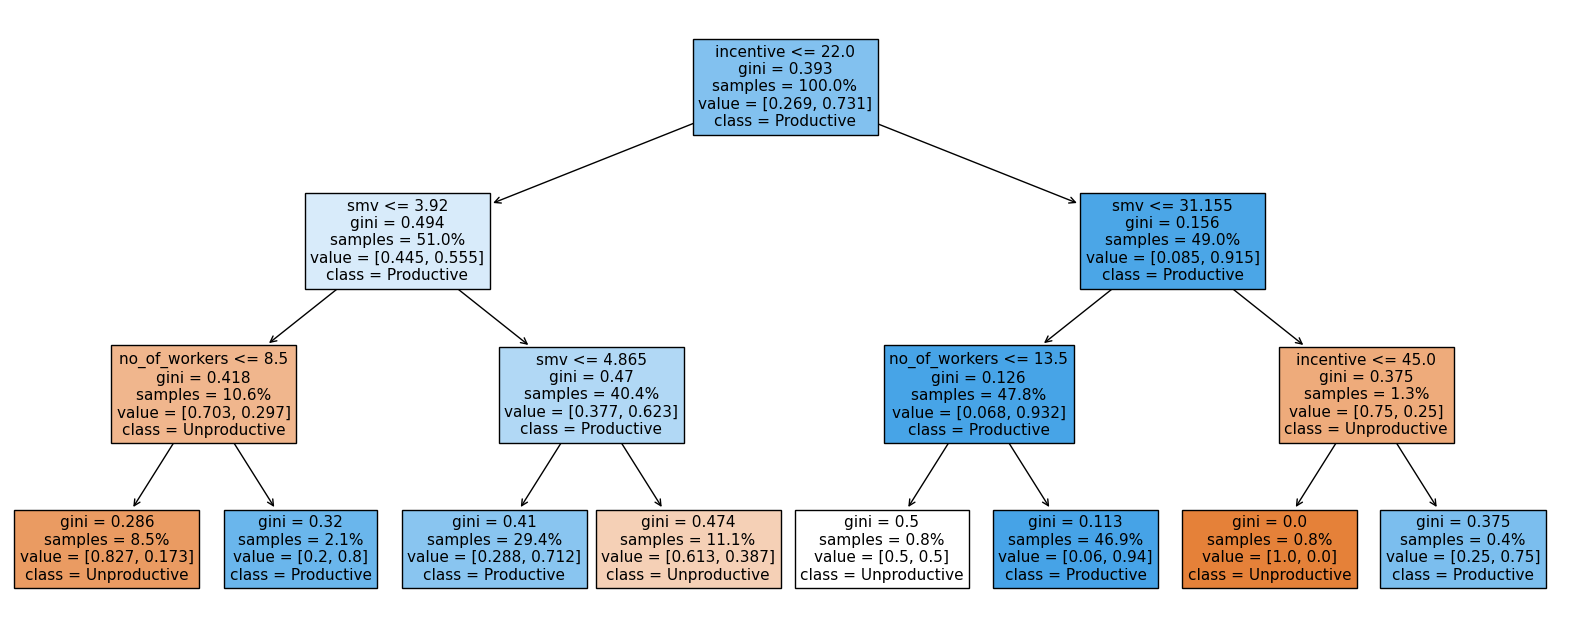

In [46]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

### Model Accuracy

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# shows (True negatives, False Positives, False Negatives, True Positives)

array([[ 35,  30],
       [ 14, 161]])

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [49]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.84


In [50]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.92


In [51]:
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

F1 Score: 0.88


In [52]:
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Accuracy: 0.82


We can see precision, recall, f1 and accuracy all have scores better than 70% which is good!

### Explaining the Tree

The goal of a decision tree is to find the best variables (also referred to as features) in the data which will predict a certain outcome.  In our case, the outcome we're looking to predict is the whether a given team met or did better than the targeted productivity amount (which makes this a categorical decision tree).  The define the model to have a total of 3 levels and it automatically determines the best splits and variables to predict outcomes based on existing data. 

For example, our tree found smv, no_of_workers and incentives were the best predictive varibles seen at the top of the boxes in the model.  For each level in the tree, the model determines a split where moving down the left is True and the right is false.  For example if you had a team with a 20 incentive value, 20 <= 22 so you would move to the left box down and evaulate the next criteria smv <= 3.92. Based on the test data, the model was able to predict our target variable (whether productive was met or exceeded) with 82% accuracy.  That's pretty good! 

We can use this data to help boost productivity in the workplace by knowing these thresholds of incentive, employee counts and 

### Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.81


In [54]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


The accuracy of the random forest model was very similar to our decision tree (81% vs 82%) which tells us the results are solid and we havea decent model.  This helps us confirm we are not overfitting the data.

### Final Thoughts

The majority of work in decision tree models is cleaning and understanding the data we're dealing with. Once the data is cleaned, columns all have to be converted to numerical formats utilizing get_dummies or other techniques.  Evaluating the model reviewing metrics like the accuracy, precision, recall, etc should always be completed.  Utilzing random forest models can also help confirm the models viability to know we are not overfitting.